# Machine Learning Unsuprivsed Data

### Classifing Countries using Principal Components Analysis (PCA) and Kmeans Clusting


For reference, here is a description of each column in the data set:
- country: Name of the country
- child_mort
Death of children under 5 years of age per 1000 live births
- exports
Exports of goods and services per capita. Given as %age of the GDP per capita
- health: 
Total health spending per capita. Given as %age of GDP per capita
- imports
Imports of goods and services per capita. Given as %age of the GDP per capita
- Income
Net income per person
- Inflation
The measurement of the annual growth rate of the Total GDP
- life_expec
The average number of years a new born child would live if the current mortality patterns are to
remain the same
- total_fer
The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp
The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
country = pd.read_csv("/Users/mo/Desktop/Desktop/Work/Github/Data_Science/Data/Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
X_co=country.drop('country',axis=1)
y_co=country['country']

In [6]:
X_co.var()

child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64

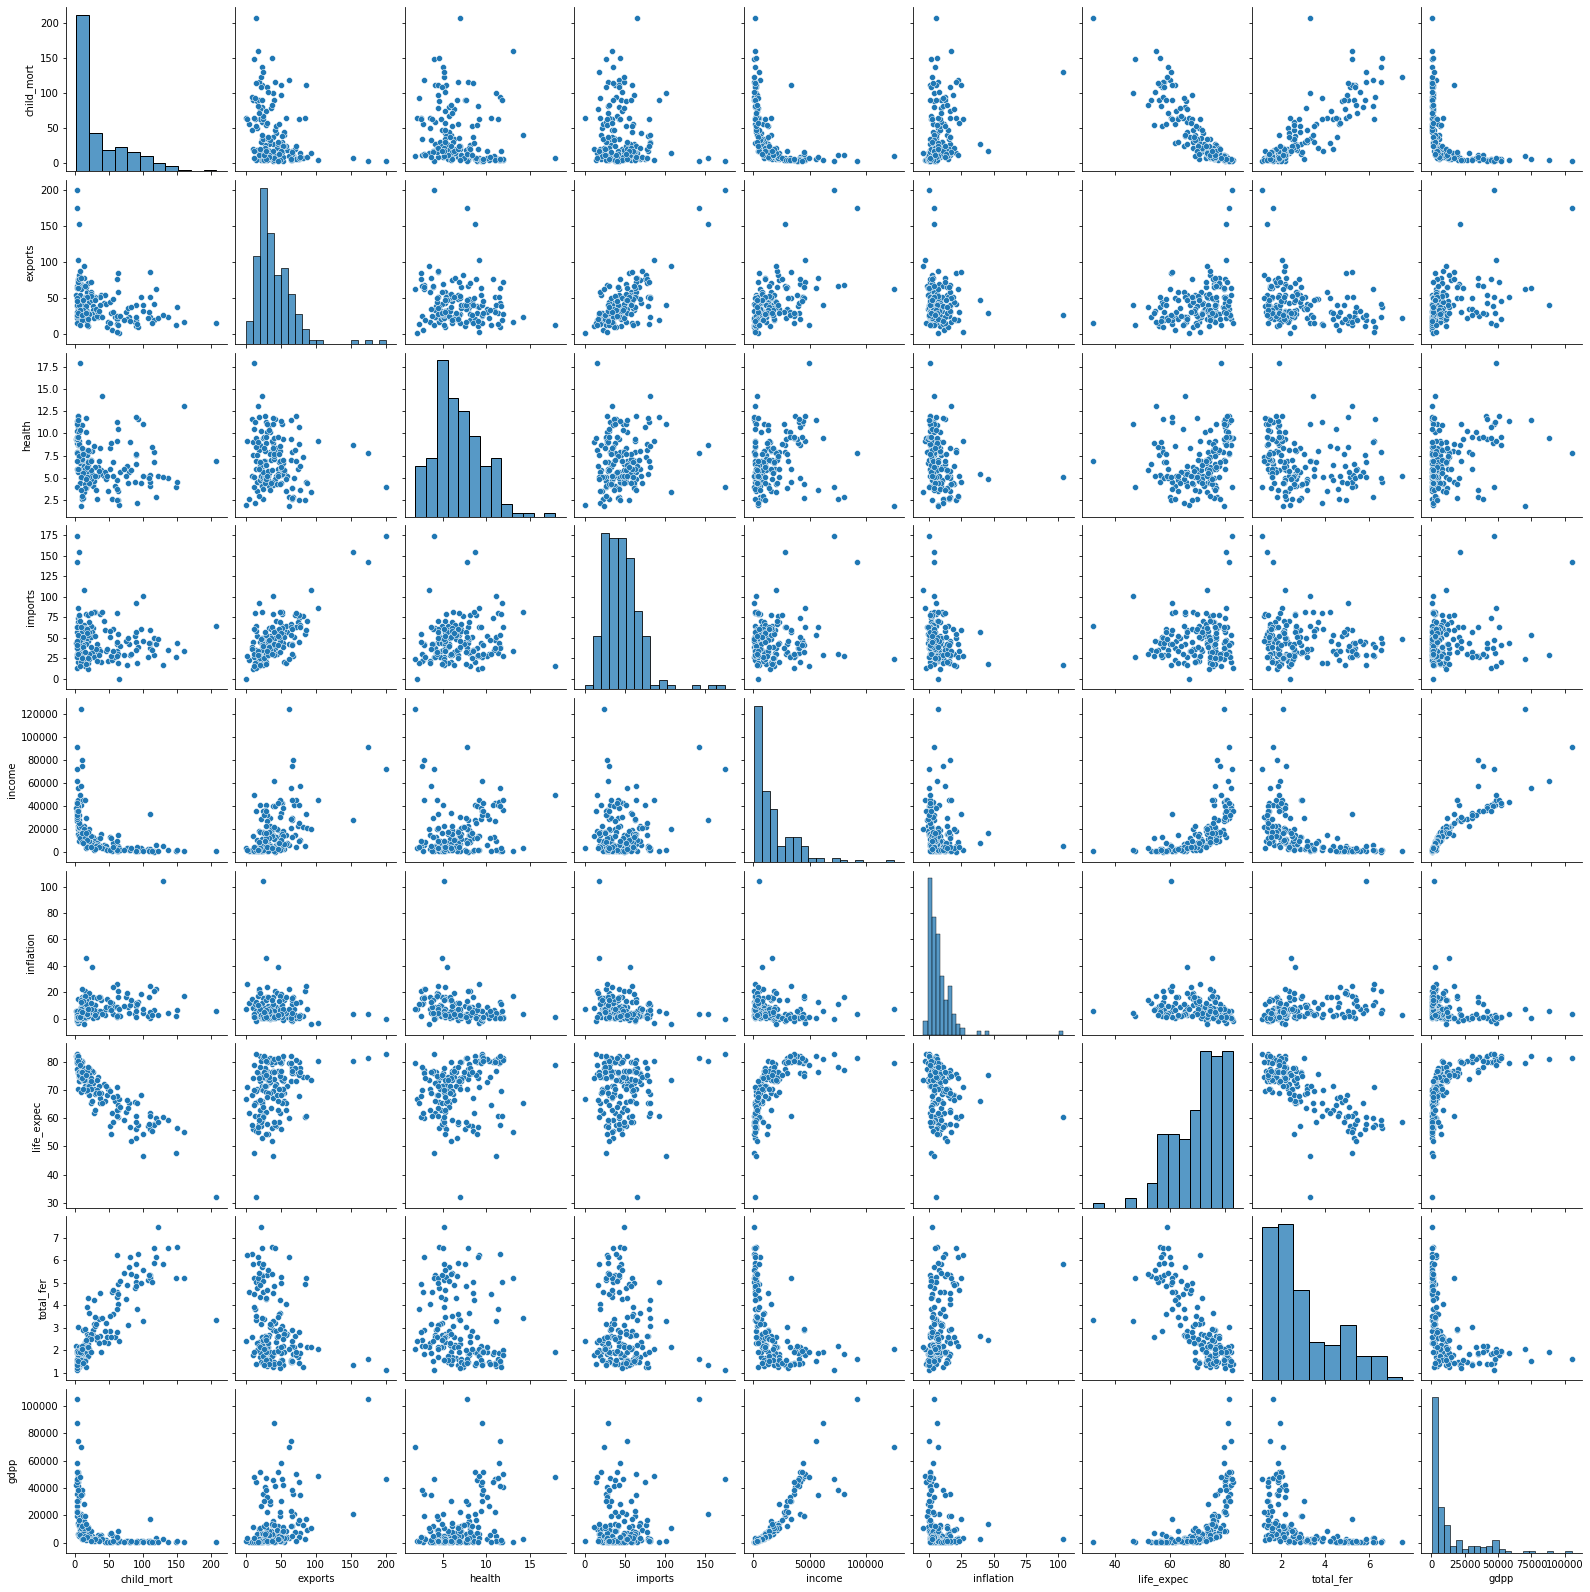

In [7]:
sns.pairplot(X_co)

# Scale Data

In [8]:
scaler = StandardScaler().fit(X_co)
x_co_scaled = scaler.transform(X_co)

In [9]:
pca = PCA(2).fit_transform(x_co_scaled)
x_fit = PCA(2).fit(x_co_scaled)

pca9 = PCA(9).fit_transform(x_co_scaled)
x_fit9 = PCA(9).fit(x_co_scaled)

print("9 PCA: Orignial", X_co.shape)
print("2 PCA:",pca.shape)

9 PCA: Orignial (167, 9)
2 PCA: (167, 2)


In [10]:
print(x_fit.explained_variance_ratio_)

[0.4595174  0.17181626]


In [11]:
principalDf = pd.DataFrame(data = pca
             , columns = ['PCA1', 'PCA2'])
finalDf = pd.concat([country[['country']], principalDf] , axis = 1)
finalDf = finalDf.sort_values(by=["PCA1"],ascending=False)
finalDf

,country,PCA1,PCA2
91,Luxembourg,6.917755,4.849844
133,Singapore,5.783376,6.682090
123,Qatar,4.242296,-0.195604
145,Switzerland,4.088544,-0.429462
114,Norway,3.721195,-1.447255
...,...,...,...
112,Niger,-3.450168,0.969922
32,Chad,-3.557555,1.289128
31,Central African Republic,-3.964964,0.386619
66,Haiti,-4.409717,1.742230


In [12]:
pca9 = pd.DataFrame(x_fit9.components_,
                     columns=list(X_co.columns)).rename(index={0:'PCA1',
                                                               1:"PCA2",
                                                               2:'PCA3',
                                                               3:"PCA4",
                                                               4:'PCA5',
                                                               5:"PCA6",
                                                               6:'PCA7',
                                                               7:"PCA8",
                                                               8:'PCA9'})
pca9

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PCA1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
PCA2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022
PCA3,-0.029544,0.144761,-0.596632,-0.299927,0.301548,0.642520,0.113919,0.019549,0.122977
PCA4,0.370653,0.003091,0.461897,-0.071907,0.392159,0.150442,-0.203797,0.378304,0.531995
PCA5,-0.168970,0.057616,0.518000,0.255376,-0.247150,0.714869,0.108220,-0.135262,-0.180167
PCA6,0.200628,-0.059333,0.007276,-0.030032,0.160347,0.066285,-0.601127,-0.750689,0.016779
PCA7,-0.079489,-0.707303,-0.249831,0.592190,0.095562,0.104633,0.018486,0.028826,0.242998
PCA8,-0.682743,-0.014197,0.072497,-0.028946,0.352624,-0.011538,-0.504664,0.293353,-0.249696
PCA9,0.327542,-0.123082,0.113088,0.099037,0.612982,-0.025236,0.294040,-0.026336,-0.625646


In [13]:
pca12 = pca9[0:2]
pca12

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PCA1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
PCA2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022


### Analysis
It is tough to interperate of the meaning since we have 9 feautres since.  It shows that we have approx -42% of child_mort which tells us the variation of the data in PCA 1 decreasing childern mortality in large volume of countries. Also it seams life_expec has 42.6% explaination of  variation of large volume in countries such that life_expec. We see that health does not explain a lot of the variation of countries while we see income explains by 40% variation in PCA1. PCA 2 how lower variation in volume in term to PCA 1 and does not explain a lot of the features in the dataset. However, we see a 67% of imports and 61% of exports in PCA 2 explaing the varation and this shows how the second conditions explain the export and imports direction to the first principal component. 

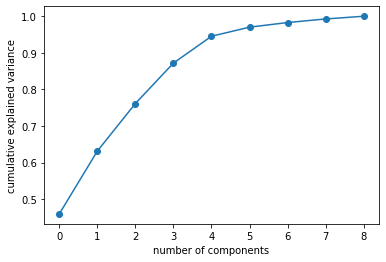

In [14]:
plt.plot(np.cumsum(x_fit9.explained_variance_ratio_), marker="o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
x_fit9.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [16]:
var_ratio=x_fit.explained_variance_ratio_
print(var_ratio)
print(var_ratio.sum())

[0.4595174  0.17181626]
0.6313336543771413


### Analysis
from the first 2 PCA compoenents explain about 63% of the data, we see that PCA 1 has a 45.9% explained variance ratio of countries which does indicate a large volume in the variation of the data in term of countries. while we see the second component has 17% explaination of the variation.

In [17]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


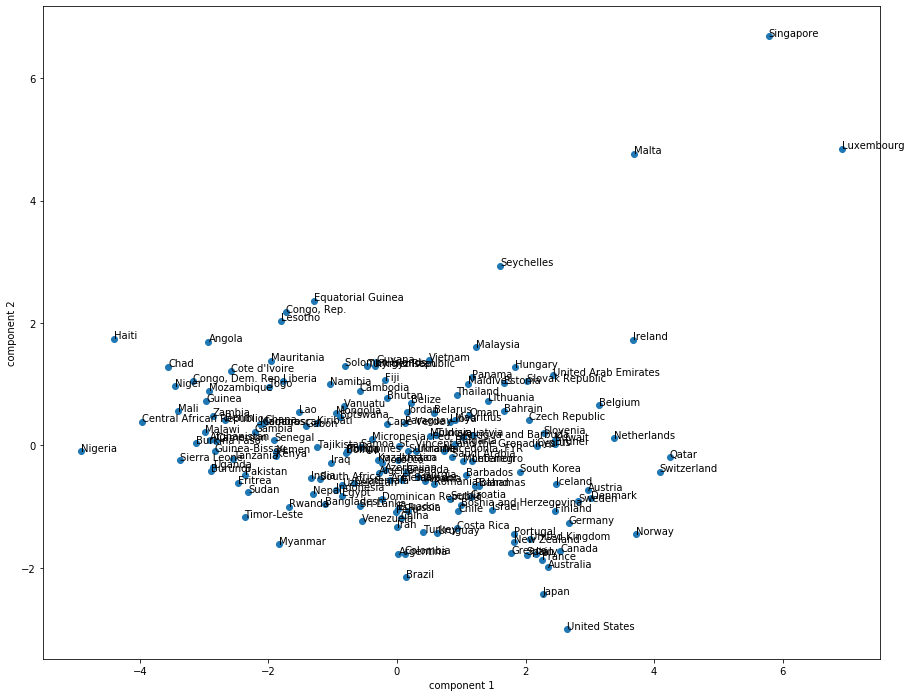

In [18]:
fig,ax=plt.subplots(figsize=(15,12))
xx=pca[:,0]
yy=pca[:,1]
plt.scatter(xx, yy)
plt.xlabel('component 1')
plt.ylabel('component 2')
for i,txt in enumerate(y_co):
    ax.annotate(txt, (xx[i], yy[i]))

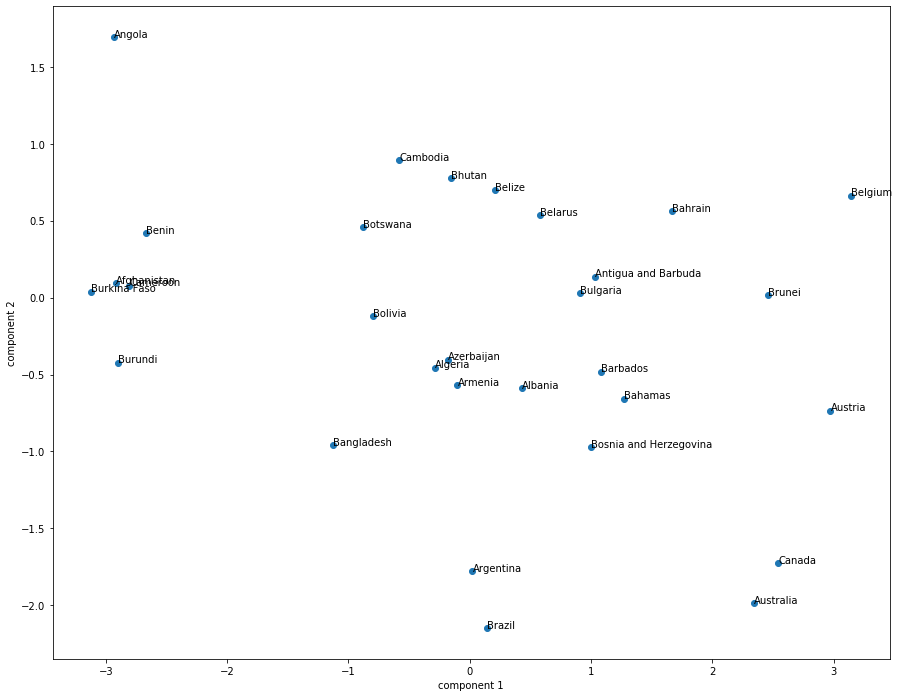

In [19]:
fig,ax=plt.subplots(figsize=(15,12))
xx=pca[:,0][:30]
yy=pca[:,1][:30]
plt.scatter(xx, yy)
plt.xlabel('component 1')
plt.ylabel('component 2')
for i,txt in enumerate(y_co[:30]):
    ax.annotate(txt, (xx[i], yy[i]))

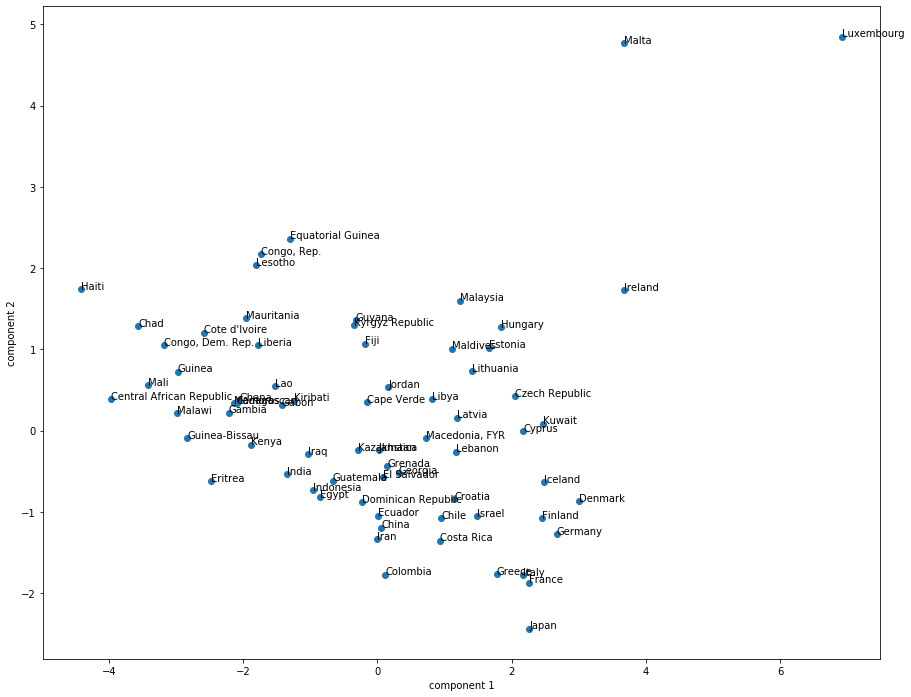

In [20]:
fig,ax=plt.subplots(figsize=(15,12))
xx=pca[:,0][30:100]
yy=pca[:,1][30:100]
plt.scatter(xx, yy)
plt.xlabel('component 1')
plt.ylabel('component 2')
for i,txt in enumerate(y_co[30:100]):
    ax.annotate(txt, (xx[i], yy[i]))

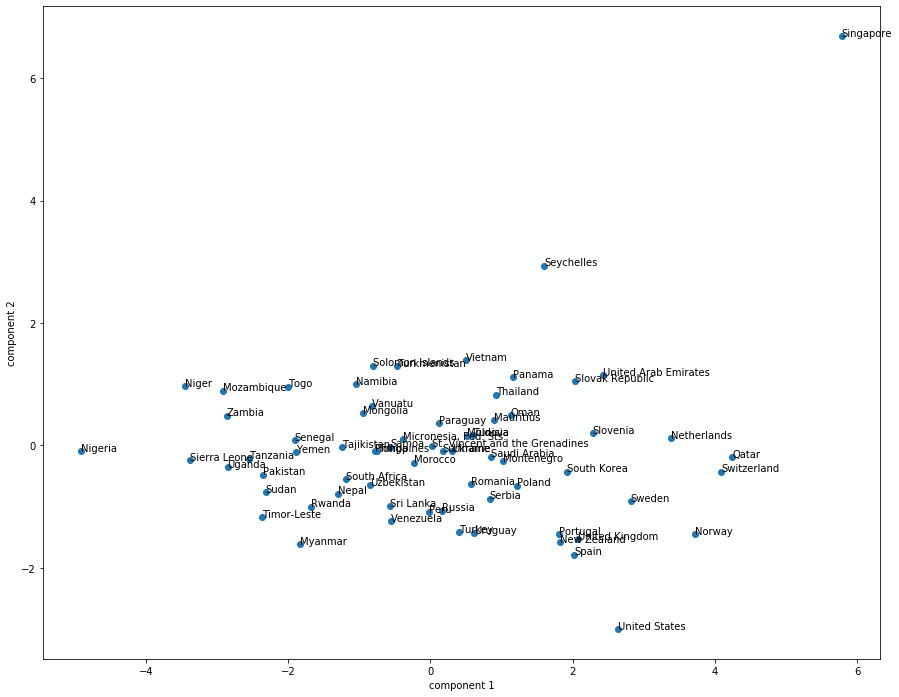

In [21]:
fig,ax=plt.subplots(figsize=(15,12))
xx=pca[:,0][100:]
yy=pca[:,1][100:]
plt.scatter(xx, yy)
plt.xlabel('component 1')
plt.ylabel('component 2')
for i,txt in enumerate(y_co[100:]):
    ax.annotate(txt, (xx[i], yy[i]))

### Analysis
we see that the scatter plot shows more explaination of our two PCAs, that is because we can see each country variation of both PCAs and it does make sense where we see some has large explnation of PCA1 and others like PCA2. We notice that some countries explain a lot by both PCA 1 and 2. Singapore and Luxembuorg shows higher variation of the data by higher than 40% explaination of the variation. USA shows very low variation in PCA 2 and it is the lowest country of PCA2. Luxembourg is the highest country of PCA1. and Nigeria shows lowest in variance in PCA1


# Kmeans Clusting

In [22]:
from sklearn.cluster import KMeans

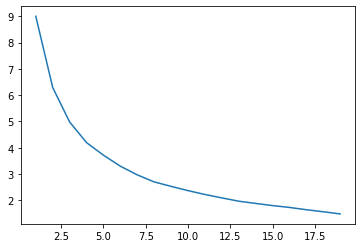

In [24]:
def km_mse(inputs,k):
    mse=[]
    for i in range(1,k):
        errors=[]
        kmeans = KMeans(n_clusters=i, n_init=50,random_state=0).fit(inputs)
        for pt,lab in zip(inputs,kmeans.labels_):
            errors.append(np.linalg.norm(pt-kmeans.cluster_centers_[lab])**2)
        mse.append(np.mean(errors))
    return mse

country_means=km_mse(x_co_scaled,20)
plt.plot(list(range(1,20)),country_means)

### Analysis: we cannot determine how many cluster we have from the above graph. Therefore we we dont see a value for k that seem to be best for the dataset. We need to test kmean with different clusters 

In [26]:
country_kmeans = KMeans(n_clusters=8,n_init=30,random_state=0).fit(x_co_scaled)
for i in range(8):
    print(i+1,":",(country_kmeans.labels_==i).sum())

1 : 3
2 : 35
3 : 23
4 : 54
5 : 33
6 : 12
7 : 1
8 : 6


In [28]:
country_kmeans = KMeans(n_clusters=7,n_init=30,random_state=0).fit(x_co_scaled)
for i in range(7):
    print(i+1,":",(country_kmeans.labels_==i).sum())

1 : 23
2 : 46
3 : 46
4 : 43
5 : 5
6 : 3
7 : 1


In [29]:
country_kmeans = KMeans(n_clusters=6,n_init=30,random_state=0).fit(x_co_scaled)
for i in range(6):
    print(i+1,":",(country_kmeans.labels_==i).sum())

1 : 2
2 : 50
3 : 40
4 : 3
5 : 27
6 : 45


In [30]:
country_kmeans = KMeans(n_clusters=5,n_init=30,random_state=0).fit(x_co_scaled)
for i in range(5):
    print(i+1,":",(country_kmeans.labels_==i).sum())

1 : 29
2 : 86
3 : 48
4 : 3
5 : 1


In [31]:
country_kmeans = KMeans(n_clusters=4,n_init=30,random_state=0).fit(x_co_scaled)
for i in range(4):
    print(i+1,":",(country_kmeans.labels_==i).sum())

1 : 30
2 : 87
3 : 47
4 : 3


In [32]:
country_kmeans = KMeans(n_clusters=3,n_init=30,random_state=0).fit(x_co_scaled)
for i in range(3):
    print(i+1,":",(country_kmeans.labels_==i).sum())

1 : 36
2 : 47
3 : 84


In [34]:
country_res = pd.DataFrame(country_kmeans.cluster_centers_,
                     columns=list(X_co.columns)).rename(index={0:'Cluster 1', 1:"Cluster 2", 2:'Cluster 3'})
country_res

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster 1,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
Cluster 2,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
Cluster 3,-0.406453,-0.031653,-0.224471,0.024162,-0.251770,-0.017167,0.254734,-0.424343,-0.354481


### Analysis: 
after we have performed 3 clusters which seems the best fit for the dataset, now we can test the cluster centriod of each cluster and see if countries fit the cluster. We have 36 countries in Cluster 1, 47 countries in Cluster 2, and 84 countries in Cluster 3. from the dataframe above, we can interperate that Cluster 1 has low child_mort, high export, high health, and very high income which seams like a rich country such the USA and ot could fit in this cluster. Also, we notice very high child_mort in cluster 2 and low exports and imports with low gdp and health, and that might be a poor countries charachteristic such as Afghanistan or Chad from an economical prospecitve. Lastly, in cluster 3, we have the highest number of countries and migh have somthing in the middle where we have child_mort is about -0.4 compared to cluster 1 and 2. also, income, health  and exports are slightly low but between cluster 1 and 2, yet highest life_expec. We can assume a lot of countires in the middle such as India and China. I think generally, it is aligned reasonably with the interpertaition when we look at the cluster labels of countries below

In [36]:
cluster1 = y_co[(country_kmeans.labels_==0)]
cluster2 = y_co[(country_kmeans.labels_==1)]
cluster3 = y_co[(country_kmeans.labels_==2)]
d= {'cluster 1': list(cluster1), 'cluster 2': list(cluster2),'cluster 3': list(cluster3)}

df = pd.DataFrame.from_dict(d, orient='index').transpose()
df.head(50)

,cluster 1,cluster 2,cluster 3
0,Australia,Afghanistan,Albania
1,Austria,Angola,Algeria
2,Bahrain,Benin,Antigua and Barbuda
3,Belgium,Botswana,Argentina
4,Brunei,Burkina Faso,Armenia
5,Canada,Burundi,Azerbaijan
6,Cyprus,Cameroon,Bahamas
7,Czech Republic,Central African Republic,Bangladesh
8,Denmark,Chad,Barbados
9,Finland,Comoros,Belarus


In [37]:
from scipy.cluster.hierarchy import linkage,dendrogram,ward 
from sklearn.cluster import AgglomerativeClustering

# Machine Learning - Kmeans Model

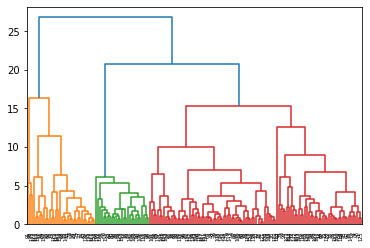

In [40]:
linkage_array=ward(x_co_scaled)
plt.figure()
dn = dendrogram(linkage_array)

In [41]:
aggclust = AgglomerativeClustering(3, linkage="ward").fit(x_co_scaled)
for i in range(3):
    print(i+1,":",(aggclust.labels_==i).sum())

1 : 34
2 : 106
3 : 27


In [42]:
cluster1_agg = y_co[(aggclust.labels_==0)]
cluster2_agg = y_co[(aggclust.labels_==1)]
cluster3_agg = y_co[(aggclust.labels_==2)]
d_agg= {'cluster 1': list(cluster1_agg), 'cluster 2': list(cluster2_agg),'cluster 3': list(cluster3_agg)}

df_agg = pd.DataFrame.from_dict(d_agg, orient='index').transpose()
df_agg.head(50)

,cluster 1,cluster 2,cluster 3
0,Australia,Albania,Afghanistan
1,Austria,Algeria,Benin
2,Bahrain,Angola,Burkina Faso
3,Belgium,Antigua and Barbuda,Burundi
4,Brunei,Argentina,Cameroon
5,Canada,Armenia,Central African Republic
6,Denmark,Azerbaijan,Chad
7,Finland,Bahamas,Comoros
8,France,Bangladesh,"Congo, Dem. Rep."
9,Germany,Barbados,Cote d'Ivoire


### Analysis
In Agglomertive Clustring, we have different distribution where cluster 1 is 34 countries , cluster 2 is 106 and cluster 3 is 27 countries. Some countries are still the same in same cluster 1 as in kmean such as USA. however, we notice that China and India moved from Cluster 3 to cluster 2 and this is becasue we used ward algorthim to merges the two clusters for which the variance within all clusters increases the least. 


In [43]:
cross = pd.crosstab(index=aggclust.labels_,
                    columns= country_kmeans.labels_, 
                    rownames=["Agglomertive"], 
                    colnames=["Kmeans"])
cross =cross.rename(index={0:"Cluster 1", 1:'Cluster 2', 2:"Cluster 3"}, columns={0:"Cluster 1", 1:'Cluster 2', 2:"Cluster 3"})
cross

Kmeans,Cluster 1,Cluster 2,Cluster 3
Agglomertive,,,
Cluster 1,31,0,3
Cluster 2,5,20,81
Cluster 3,0,27,0


### Analysis
Therefore, in Crosstab, we can compare how we match correct clustering in the kmeans vs Agglomertive Clustring. We notice that we have 31 correct countries of Cluster 1 matching as common countries. we got 20 correct match countries in cluster 2. That is, we have zero correct match countries in cluster 3 between Agglomertive Clustring and Kmeans

In [46]:
correct_rate =round((cross.iloc[1][1]+cross.iloc[0][0]+cross.iloc[2][2])/len(X_co),3)*100
print("The total rate of correct match:",correct_rate)


The total rate of correct match: 30.5
